In [2]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plotdiagram
import matplotlib.pyplot as plt
import seaborn as sea
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
# Importing matplotlib and seaborn

import seaborn as sns
%matplotlib inline

from sklearn.impute import SimpleImputer, KNNImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from imblearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


import warnings
warnings.filterwarnings('ignore') # to ignore the warnings

In [3]:
# Display all columns of the dataframe
pd.set_option('display.max_columns', None)

In [4]:
DATE_COL   = "Application Date"

df_all = pd.read_csv('/Users/tanishq/PycharmProjects/NIScPR/FinTech/DerwentData_TS/ml/MainData.csv')
df_all[DATE_COL] = pd.to_datetime(df_all[DATE_COL], errors="coerce")

df = df_all[(df_all[DATE_COL] >= '2000-01-01') & (df_all[DATE_COL] <= '2022-12-31')]
df_unseen = df_all[(df_all[DATE_COL] >= '2023-01-01') & (df_all[DATE_COL] <= '2024-12-31')]

Data understanding and Cleaning

Check if there are any header or footer or summary details are there. IF found, delete it.

In [6]:
df=df[['Publication Number','Application Date','Publication Date','IPC Subclass','Assignee Standardized','Claims Count','Assignee Count','Inventor Standardized','Publication Country Code','Count of Cited Refs - Patent','Count of Cited Refs - Non-patent','Count of Citing Patents','DWPI Count of Family Members','DWPI Count of Family Countries/Regions']]
#df_uns
#Publication Number	Publication Date	Earliest Priority Year	Publication Country Code	Assignee Standardized	Inventor Standardized	IPC Subclass	Count of Cited Refs - Patent	Count of Cited Refs - Non-patent	Count of Citing Patents	DWPI Count of Family Members	Assignee Count	Inventor Count	Claims Count	Legal Years Remaining	IPC Count	DWPI Count of Family Countries/Regions	Application Date	Application Country/Region

In [8]:
df_unseen=df_unseen[['Publication Number','Application Date','Publication Date','IPC Subclass','Assignee Standardized','Claims Count','Assignee Count','Inventor Standardized','Publication Country Code','Count of Cited Refs - Patent','Count of Cited Refs - Non-patent','Count of Citing Patents','DWPI Count of Family Members','DWPI Count of Family Countries/Regions']]


In [9]:
df.shape


(20769, 14)

In [10]:
df_unseen.shape

(9823, 14)

In [11]:
print('Total rows with nulls or blanks',len(df.columns[df.isna().all()].tolist() ))
print('Total rows with nulls ',len(df.columns[df.isnull().all()].tolist() ))
na_list = df.columns[df.isna().any()].tolist()

Total rows with nulls or blanks 0
Total rows with nulls  0


In [12]:
#Now delete all the columns for which all rows are having value null
df = df.dropna(axis=1, how='all')
print('data shape=',df.shape)

data shape= (20769, 14)


In [13]:
print('Total rows with nulls or blanks',len(df_unseen.columns[df_unseen.isna().all()].tolist() ))
#print('Total rows with nulls ',len(df.columns[df_unseen.isnull().all()].tolist() ))
na_list = df_unseen.columns[df_unseen.isna().any()].tolist()

Total rows with nulls or blanks 0


In [14]:
#Now delete all the columns for which all rows are having value null
df_unseen = df_unseen.dropna(axis=1, how='all')
print('data shape=',df_unseen.shape)

data shape= (9823, 14)


In [15]:
df.isnull().sum()

Publication Number                        0
Application Date                          0
Publication Date                          0
IPC Subclass                              0
Assignee Standardized                     0
Claims Count                              0
Assignee Count                            0
Inventor Standardized                     0
Publication Country Code                  0
Count of Cited Refs - Patent              0
Count of Cited Refs - Non-patent          0
Count of Citing Patents                   0
DWPI Count of Family Members              0
DWPI Count of Family Countries/Regions    0
dtype: int64

In [16]:
df_unseen.isnull().sum()

Publication Number                        0
Application Date                          0
Publication Date                          0
IPC Subclass                              0
Assignee Standardized                     0
Claims Count                              0
Assignee Count                            0
Inventor Standardized                     0
Publication Country Code                  0
Count of Cited Refs - Patent              0
Count of Cited Refs - Non-patent          0
Count of Citing Patents                   0
DWPI Count of Family Members              0
DWPI Count of Family Countries/Regions    0
dtype: int64

df=df[['Publication Number','Application Number','Application Date','Publication Date','DWPI Family Members Dead/Alive','IPC - Current','Assignee/Applicant','Claims Count','Assignee Count','Inventor','inventor_list','Inventor Count','Publication Country Code','Application Country/Region','Related Applications','Count of Cited Refs - Patent','Count of Cited Refs - Non-patent','Count of Citing Patents','Assignee - Original - Country/Region (Original Language)','DWPI Family Members','DWPI Count of Family Members','DWPI Count of Family Countries/Regions']]
#df_unseen=df_unseen[['Publication Number','Application Number','Application Date','Publication Date','DWPI Family Members Dead/Alive','IPC - Current','Assignee/Applicant','Claims Count','Assignee Count','Inventor','Inventor Count','Publication Country Code','Application Country/Region','Related Applications','Count of Cited Refs - Patent','Count of Cited Refs - Non-patent','Count of Citing Patents','Assignee - Original - Country/Region (Original Language)','DWPI Family Members','DWPI Count of Family Members','DWPI Count of Family Countries/Regions']]


In [17]:
print('df.shape',df.shape)

df.shape (20769, 14)


In [18]:
print('df_unseen.shape',df_unseen.shape)

df_unseen.shape (9823, 14)


In [21]:
#Now check if there any duplicates present
#duplicate_rows = len(df[df.duplicated()])
#print('Duplicate rows ', duplicate_rows)

In [19]:
#Check percentage of nulls or blanks in columns
df.isnull().sum()*100/len(df)
print(df.isnull().sum()*100/len(df))

Publication Number                        0.0
Application Date                          0.0
Publication Date                          0.0
IPC Subclass                              0.0
Assignee Standardized                     0.0
Claims Count                              0.0
Assignee Count                            0.0
Inventor Standardized                     0.0
Publication Country Code                  0.0
Count of Cited Refs - Patent              0.0
Count of Cited Refs - Non-patent          0.0
Count of Citing Patents                   0.0
DWPI Count of Family Members              0.0
DWPI Count of Family Countries/Regions    0.0
dtype: float64


In [20]:
#Check percentage of nulls or blanks in columns
df_unseen.isnull().sum()*100/len(df_unseen)
print(df_unseen.isnull().sum()*100/len(df_unseen))

Publication Number                        0.0
Application Date                          0.0
Publication Date                          0.0
IPC Subclass                              0.0
Assignee Standardized                     0.0
Claims Count                              0.0
Assignee Count                            0.0
Inventor Standardized                     0.0
Publication Country Code                  0.0
Count of Cited Refs - Patent              0.0
Count of Cited Refs - Non-patent          0.0
Count of Citing Patents                   0.0
DWPI Count of Family Members              0.0
DWPI Count of Family Countries/Regions    0.0
dtype: float64


In [24]:
df


,Publication Number,Application Date,Publication Date,IPC Subclass,Assignee Standardized,Claims Count,Assignee Count,Inventor Standardized,Publication Country Code,Count of Cited Refs - Patent,Count of Cited Refs - Non-patent,Count of Citing Patents,DWPI Count of Family Members,DWPI Count of Family Countries/Regions
6262,KR2024108139A,2022-12-31,2024-07-09,G06Q | G06F | H04L,GDD CORPORATION CO LTD,8.0,1,JINYOUNG KIM,KR,1,0,0,1.0,1.0
6263,CN116385236A,2022-12-31,2023-07-04,G06Q | G06F,SHANXI BRANCH OF CHINA CONSTRUCTION BANK CO LTD,9.0,1,ZHANG JIAN LI,CN,0,0,0,1.0,1.0
6264,WO2023130060A1,2022-12-30,2023-07-06,G06F,PURE STORAGE INC,8.0,1,KIRKPATRICK PETER,WO,2,2,4,8.0,139.0
6265,US20240039641A1,2022-12-30,2024-02-01,H04B | H04L,LG ELECTRONICS INC,16.0,2,KIM JAYEONG | AHN BYUNGKYU | LEE SANGRIM | LEE...,US,4,5,3,5.0,135.0
6266,US20230283384A1,2022-12-30,2023-09-07,H04B,LG ELECTRONICS INC,12.0,2,AHN BYUNGKYU | LEE SANGRIM | LEE HOJAE | KIM J...,US,15,3,2,5.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30587,EP3667595B1,2018-08-07,2025-02-26,G06Q,NTI INC,2.0,1,NAKAMURA TAKATOSHI,EP,7,6,0,8.0,135.0
30588,EP3627420B1,2018-05-17,2025-07-09,H04L | G06Q,NTI INC,2.0,1,NAKAMURA TAKATOSHI,EP,10,1,0,11.0,135.0
30589,EP3507758B1,2017-06-21,2025-09-17,G06Q,CHICAGO MERCANTILE EXCHANGE INC,15.0,1,MILLHUFF PAUL | LUSTYK NEIL | SCHEERER JOHN | ...,EP,5,0,0,4.0,135.0
30590,EP4525372A2,2016-02-12,2025-03-19,H04L,YOTI HOLDING LIMITED,15.0,1,LOUGHLIN MCHUGH ELEANOR SIMONE FREDERIKA | SZC...,EP,2,0,0,23.0,131.0


In [25]:
Field_list_sort=['Count of Cited Refs - Patent','Count of Cited Refs - Non-patent','Count of Citing Patents']
df['High Quality'] = 0  # Initialize all rows with 0
for i in Field_list_sort:
# Step 1: Sort the DataFrame based on 'Claims Count' in descending order
 df = df.sort_values(by=i, ascending=False).reset_index(drop=True)

# Step 2: Calculate the number of rows representing the top 5%
 top_5_percent_index = int(len(df) * 0.05)

# Step 3: Set 'High Quality' to 0 for all rows and 1 for the top 5%
 df.loc[:top_5_percent_index, 'High Quality'] = 1
    



print(df)


      Publication Number Application Date Publication Date IPC Subclass  \
0        US20150206106A1       2015-01-13       2015-07-23         G06Q   
1        US20190171438A1       2018-12-06       2019-06-06  G06F | G06N   
2        US20190238525A1       2018-01-31       2019-08-01  H04L | G06F   
3        US20190236598A1       2018-10-31       2019-08-01  G06Q | H04L   
4        US20130218769A1       2012-08-23       2013-08-22         G06Q   
...                  ...              ...              ...          ...   
20764       CN111563761B       2020-01-19       2024-06-07  G06Q | G06F   
20765      KR2021107868A       2020-01-13       2021-09-01  H04W | H04L   
20766      KR2023005658A       2021-07-01       2023-01-10         G06Q   
20767       CN116963304A       2022-10-28       2023-10-27  H04W | H04L   
20768       CN114253978A       2021-12-21       2022-03-29         G06F   

                           Assignee Standardized  Claims Count  \
0                                

In [26]:
df.head()

,Publication Number,Application Date,Publication Date,IPC Subclass,Assignee Standardized,Claims Count,Assignee Count,Inventor Standardized,Publication Country Code,Count of Cited Refs - Patent,Count of Cited Refs - Non-patent,Count of Citing Patents,DWPI Count of Family Members,DWPI Count of Family Countries/Regions,High Quality
0,US20150206106A1,2015-01-13,2015-07-23,G06Q,YAGO YARON EDAN,20.0,1,YAGO YARON EDAN,US,2,1,407,2.0,117.0,1
1,US20190171438A1,2018-12-06,2019-06-06,G06F | G06N,ARCHEMY INC,29.0,1,FRANCHITTI JEAN CLAUDE L,US,9,1,376,3.0,134.0,1
2,US20190238525A1,2018-01-31,2019-08-01,H04L | G06F,SALESFORCECOM INC,23.0,1,PADMANABHAN PRITHVI KRISHNAN | GOPALAN SRIRAM ...,US,2,2,364,7.0,135.0,1
3,US20190236598A1,2018-10-31,2019-08-01,G06Q | H04L,SALESFORCECOM INC,27.0,1,PADMANABHAN PRITHVI KRISHNAN,US,153,52,363,2.0,1.0,1
4,US20130218769A1,2012-08-23,2013-08-22,G06Q,POURFALLAH STACY | RAJ THANIGAIVEL ASHWIN,24.0,2,POURFALLAH STACY | RAJ THANIGAIVEL ASHWIN,US,5,0,345,4.0,116.0,1


In [27]:
#df.to_csv('GenePreprocessed1820.csv', index=False) #after sort operation on numerical fields

In [28]:
#droping non numeric values IPC - Current Count
#df.drop(['Application Number','Front Page Drawing', 'Front Page Image'],axis=1, inplace=True)
'''feature_names=['grant_lag_days','Claims Count','Assignee Count','count_inventor','Count of Cited Refs - Patent','Count of Cited Refs - Non-patent',
       'Count of Citing Patents','DWPI Count of Family Members','DWPI Count of Family Countries/Regions','RelatedApplicationCount',
        'IPC - Current Count','Sub Class Count','High Quality']#'''
feature_names=['Count of Cited Refs - Patent','Count of Cited Refs - Non-patent','Count of Citing Patents']

training_features = df[feature_names]

#df=df[]

#Now delete all the columns for which all rows are having value null
df[feature_names] = df[feature_names].dropna(axis=1, how='all')
print('data shape=',df[feature_names].shape)
# Check if there is any more na
(df.isnull().sum()*100)/len(df)

data shape= (20769, 3)


Publication Number                        0.0
Application Date                          0.0
Publication Date                          0.0
IPC Subclass                              0.0
Assignee Standardized                     0.0
Claims Count                              0.0
Assignee Count                            0.0
Inventor Standardized                     0.0
Publication Country Code                  0.0
Count of Cited Refs - Patent              0.0
Count of Cited Refs - Non-patent          0.0
Count of Citing Patents                   0.0
DWPI Count of Family Members              0.0
DWPI Count of Family Countries/Regions    0.0
High Quality                              0.0
dtype: float64

In [29]:
df[feature_names].head()

,Count of Cited Refs - Patent,Count of Cited Refs - Non-patent,Count of Citing Patents
0,2,1,407
1,9,1,376
2,2,2,364
3,153,52,363
4,5,0,345


In [30]:
#df[feature_names].to_csv('QuantPreprocessed_numbers1820.csv', index=False) #for assesment file
df_num=df[feature_names]
#df = df.dropna()
df= df.fillna(df.mean(numeric_only=True))

In [31]:
'''X=df[['grant_lag_days','Claims Count','Assignee Count','count_inventor','Count of Cited Refs - Patent','Count of Cited Refs - Non-patent',
       'Count of Citing Patents','DWPI Count of Family Members','DWPI Count of Family Countries/Regions','RelatedApplicationCount',
        'IPC - Current Count','Sub Class Count']]#'''
X=df[['Count of Cited Refs - Patent','Count of Cited Refs - Non-patent','Count of Citing Patents']]

y=df['High Quality']
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
#X_test

In [32]:
# Train test split - 80% training data, 20% validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=100)

In [33]:
# Checking the shape after split
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_val Shape:', X_val.shape)
print('y_val Shape:', y_val.shape)

X_train Shape: (16615, 3)
y_train Shape: (16615,)
X_val Shape: (4154, 3)
y_val Shape: (4154,)


Handling Data Imbalance using Synthetic Minority Over-sampling Technique (SMOTE)

In [34]:
#smt = SMOTE(random_state=2)
#X_train_smote, y_train_smote = smt.fit_resample(X_train, y_train)

Feature Scaling using SandardScaler - Training Set

In [35]:
from sklearn.preprocessing import StandardScaler

Feature Scaling using SandardScaler - Unseen Test Set

1. Logistic Regression with PCA and Hyperparameter Tuning

pca = PCA()
pca_components = pca.fit_transform(X_train)
pca_components

sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=y_train)
plt.show()

sns.scatterplot(x=pca_components[:,1], y=pca_components[:,2], hue=y_train)
plt.show()

In [36]:
def outlier_handling(dataframe):
    """
    Applies outlier handling transformations to the values in the given DataFrame.

    Parameters:
    - dataframe (DataFrame): The DataFrame containing the values to be transformed.

    Returns:
    - transformed_values (list): A list containing the transformed values based on the specified conditions.
    """

    transformed_values = []
    for value in dataframe:
        if value <= 0:
            transformed_values.append(float(0))
        elif float(value) == float(1.0):
            transformed_values.append(float(1.5))
        else:
            transformed_values.append(float(np.log1p(value)))

    return transformed_values


In [37]:
def calculate_classification_metrics(y_true, y_pred):
    """
    Calculate various classification metrics.

    Parameters:
    y_true (array-like): True labels.
    y_pred (array-like): Predicted labels.

    Returns:
    pd.DataFrame: A DataFrame containing the calculated metrics.
    """
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix')
    print()
    print(cm)
    
    # True Positives, False Positives, True Negatives, False Negatives
    TP = cm[1, 1]
    FP = cm[0, 1]
    TN = cm[0, 0]
    FN = cm[1, 0]

    # Accuracy Score
    accuracy = round((TP + TN) / (TP + FP + TN + FN), 4)

    # Sensitivity (Recall or True Positive Rate)
    sensitivity = round(TP / (TP + FN), 4)

    # Specificity
    specificity = round(TN / (TN + FP), 4)

    # Precision
    precision = round(TP / (TP + FP), 4)

    # False Positive Rate
    false_positive_rate = round(FP / (FP + TN), 4)

    # True Positive Rate
    true_positive_rate = sensitivity

    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'False Positive Rate', 'True Positive Rate'],
        'Value': [accuracy, sensitivity, specificity, precision, false_positive_rate, true_positive_rate]
    })

    return metrics_df

In [38]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = roc_curve(actual, probs,drop_intermediate = False)
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [39]:
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
pca = PCA(n_components=2,svd_solver='full')
smote = SMOTE(random_state=2)
lr = LogisticRegression(max_iter=1000, tol=0.001, random_state=42)

In [40]:
pipe = make_pipeline(
    imputer,
    smote,
    scaler,
    pca,
    lr
)

In [41]:
# Define hyperparameters grid for GridSearchCV
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__solver': ['liblinear', 'saga'],
}

In [42]:
# Instantiate GridSearchCV
lr_grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1,error_score='raise')

In [43]:
# Fit the model using GridSearchCV
lr_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('smote', SMOTE(random_state=2)),
                                       ('standardscaler', StandardScaler()),
                                       ('pca',
                                        PCA(n_components=2, svd_solver='full')),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42,
                                                           tol=0.001))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,
                                                   100],
                         'logisticregression__solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [44]:
# Get the best parameters and estimator
lr_best_params = lr_grid_search.best_params_
print("lr_best_params ", lr_best_params)
lr_best_estimator = lr_grid_search.best_estimator_
print("lr_best_estimator ", lr_best_estimator)

lr_best_params  {'logisticregression__C': 0.001, 'logisticregression__solver': 'saga'}
lr_best_estimator  Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('smote', SMOTE(random_state=2)),
                ('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2, svd_solver='full')),
                ('logisticregression',
                 LogisticRegression(C=0.001, max_iter=1000, random_state=42,
                                    solver='saga', tol=0.001))])


In [45]:
# Predict values on the training set
y_train_pred = lr_grid_search.predict(X_train)

In [46]:
# Predict values on the validation set
y_val_pred = lr_grid_search.predict(X_val)

In [47]:
# Metrics of the training set
calculate_classification_metrics(y_train, y_train_pred)

Confusion Matrix

[[14294   360]
 [  287  1674]]


,Metric,Value
0,Accuracy,0.9611
1,Sensitivity,0.8536
2,Specificity,0.9754
3,Precision,0.8230
4,False Positive Rate,0.0246
5,True Positive Rate,0.8536


In [48]:
# Metrics of the validation set
calculate_classification_metrics(y_val, y_val_pred)

Confusion Matrix

[[3557   86]
 [  67  444]]


,Metric,Value
0,Accuracy,0.9632
1,Sensitivity,0.8689
2,Specificity,0.9764
3,Precision,0.8377
4,False Positive Rate,0.0236
5,True Positive Rate,0.8689


In [49]:
# Generate a classification report
class_report = classification_report(y_val, y_val_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3643
           1       0.84      0.87      0.85       511

    accuracy                           0.96      4154
   macro avg       0.91      0.92      0.92      4154
weighted avg       0.96      0.96      0.96      4154



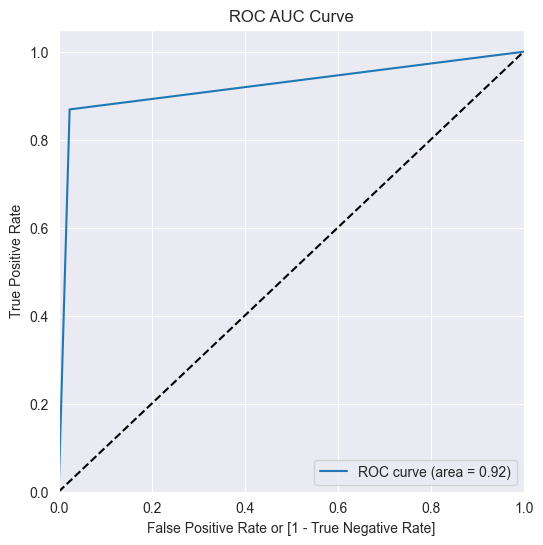

In [50]:
# ROC curve
fpr, tpr, thresholds = draw_roc(y_val, y_val_pred)

GNB Model with PCA and GridSearchCV

In [51]:
gnb = GaussianNB()
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
pca = PCA(n_components=2,svd_solver='full')
smote = SMOTE(random_state=2)
#lr = LogisticRegression(max_iter=1000, tol=0.001, random_state=42)

imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
pca = PCA(n_components=7)
smote = SMOTE(random_state=2)

In [52]:
# Create a pipeline
pipe = make_pipeline(
    imputer,
    smote,
    scaler,
    pca,
    gnb
)

In [53]:
# Define the parameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
}

# Setup GridSearchCV
gnb_grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
gnb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001]})

In [54]:
# Get the best parameters and the best score
best_params = gnb_grid_search.best_params_
best_score = gnb_grid_search.best_score_
print("best_params",best_params)
print("best_score",best_score)
# Predict on train set using the best model
y_train_pred = gnb_grid_search.predict(X_train)

# Predict on validation set using the best model
y_val_pred = gnb_grid_search.predict(X_val)

best_params {'var_smoothing': 1e-05}
best_score 0.9862774601263918


In [55]:
from sklearn.inspection import permutation_importance

# Use best estimator
gnb_best = gnb_grid_search.best_estimator_

result = permutation_importance(gnb_best, X_val, y_val, n_repeats=10, random_state=42)

feature_importance = pd.Series(result.importances_mean, index=feature_names).sort_values(ascending=False)
print(feature_importance)

Count of Citing Patents             0.086639
Count of Cited Refs - Patent        0.063288
Count of Cited Refs - Non-patent    0.059292
dtype: float64


In [56]:
# Metrics on the train set
calculate_classification_metrics(y_train, y_train_pred)

Confusion Matrix

[[14554   100]
 [  127  1834]]


,Metric,Value
0,Accuracy,0.9863
1,Sensitivity,0.9352
2,Specificity,0.9932
3,Precision,0.9483
4,False Positive Rate,0.0068
5,True Positive Rate,0.9352


In [57]:
# Metrics on the test set
calculate_classification_metrics(y_val, y_val_pred)

Confusion Matrix

[[3627   16]
 [  34  477]]


,Metric,Value
0,Accuracy,0.9880
1,Sensitivity,0.9335
2,Specificity,0.9956
3,Precision,0.9675
4,False Positive Rate,0.0044
5,True Positive Rate,0.9335


In [58]:
# Generate a classification report
class_report = classification_report(y_val, y_val_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3643
           1       0.97      0.93      0.95       511

    accuracy                           0.99      4154
   macro avg       0.98      0.96      0.97      4154
weighted avg       0.99      0.99      0.99      4154



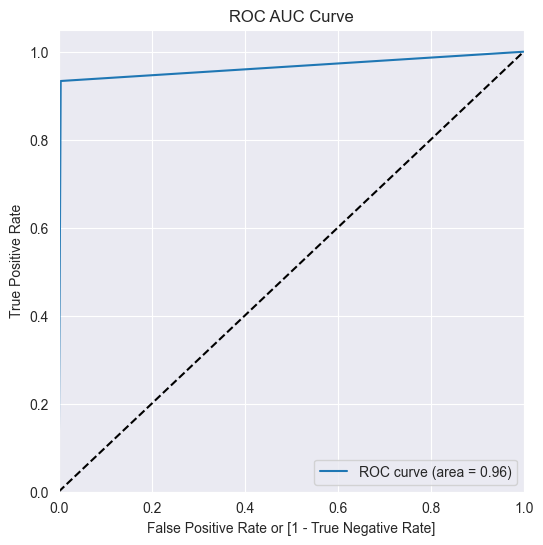

In [59]:
# ROC curve
fpr, tpr, thresholds = draw_roc(y_val, y_val_pred)

Decision Tree with PCA and GridSearchCV

In [60]:
dt = DecisionTreeClassifier(random_state=42)

In [61]:
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
pca = PCA(n_components=2)
smote = SMOTE(random_state=2)

In [62]:
# Create a pipeline
pipe = make_pipeline(
    imputer,
    smote,
    scaler,
    pca,
    dt
)

In [63]:
# Create the parameter grid based on the results of random search 
params = {
    'decisiontreeclassifier__max_depth': [2, 3, 5],
    'decisiontreeclassifier__min_samples_leaf': [5, 10, 20],
}

In [64]:
# Instantiate the grid search model
dt_grid_search = GridSearchCV(estimator=pipe, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

In [65]:
# Fit the GridSearchCV
dt_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('smote', SMOTE(random_state=2)),
                                       ('standardscaler', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': [2, 3, 5],
                         'decisiontreeclassifier__min_samples_leaf': [5, 10,
                                                                      20]},
             scoring='accuracy', verbose=1)

In [66]:
# Get the best parameters and the best score
best_params = dt_grid_search.best_params_
best_score = dt_grid_search.best_score_
print("best_params",best_params)
print("best_score",best_score)
# Predict on train set using the best model
y_train_pred = dt_grid_search.predict(X_train)

# Predict on validation set using the best model
y_val_pred = dt_grid_search.predict(X_val)

best_params {'decisiontreeclassifier__max_depth': 3, 'decisiontreeclassifier__min_samples_leaf': 5}
best_score 0.9750827565452905


In [67]:
# Metrics on the train set
calculate_classification_metrics(y_train, y_train_pred)

Confusion Matrix

[[14510   144]
 [  241  1720]]


,Metric,Value
0,Accuracy,0.9768
1,Sensitivity,0.8771
2,Specificity,0.9902
3,Precision,0.9227
4,False Positive Rate,0.0098
5,True Positive Rate,0.8771


In [68]:
# Metrics on the test set
calculate_classification_metrics(y_val, y_val_pred)

Confusion Matrix

[[3609   34]
 [  50  461]]


,Metric,Value
0,Accuracy,0.9798
1,Sensitivity,0.9022
2,Specificity,0.9907
3,Precision,0.9313
4,False Positive Rate,0.0093
5,True Positive Rate,0.9022


In [69]:
# Generate a classification report
class_report = classification_report(y_val, y_val_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3643
           1       0.93      0.90      0.92       511

    accuracy                           0.98      4154
   macro avg       0.96      0.95      0.95      4154
weighted avg       0.98      0.98      0.98      4154



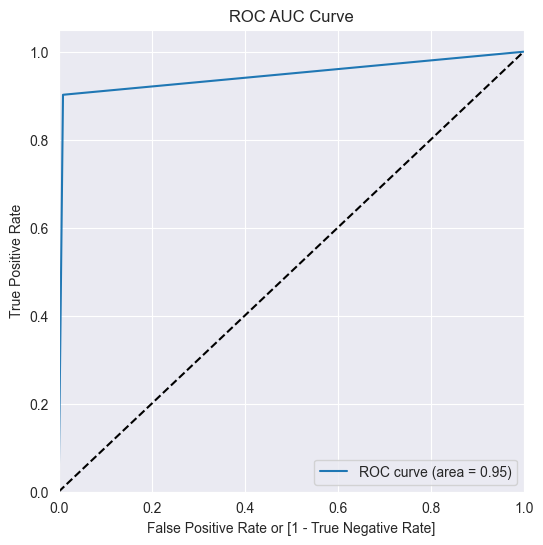

In [70]:
# ROC curve
fpr, tpr, thresholds = draw_roc(y_val, y_val_pred)

Model 3. Random Forest Classifier with PCA and Hyperparameter Tuning

In [71]:
rf = RandomForestClassifier(random_state=42)

In [72]:
# Create a pipeline
pipe = make_pipeline(
    imputer,
    smote,
    scaler,
    pca,
    rf
)

In [73]:
# Define the hyperparameters grid for Random Forest
param_grid = {
    'randomforestclassifier__n_estimators': [50],  
    'randomforestclassifier__max_depth': [5, 10],       
    'randomforestclassifier__min_samples_split': [2, 5, 10],
}

In [74]:
rf_grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [75]:
%%time
# Fit the grid search to the training data
rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: user 639 ms, sys: 76.6 ms, total: 715 ms
Wall time: 3.42 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('smote', SMOTE(random_state=2)),
                                       ('standardscaler', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [5, 10],
                         'randomforestclassifier__min_samples_split': [2, 5,
                                                                       10],
                         'randomforestclassifier__n_estimators': [50]},
             scoring='accuracy', verbose=1)

In [76]:
# Get the best parameters
best_params = rf_grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = rf_grid_search.best_estimator_

# Predict on train set using the best model
y_train_pred = rf_grid_search.predict(X_train)

# Predict on train set using the validation model
y_val_pred = rf_grid_search.predict(X_val)

Best Parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__n_estimators': 50}


In [77]:
## Metrics on the train set
calculate_classification_metrics(y_train, y_train_pred)

Confusion Matrix

[[14439   215]
 [   88  1873]]


,Metric,Value
0,Accuracy,0.9818
1,Sensitivity,0.9551
2,Specificity,0.9853
3,Precision,0.8970
4,False Positive Rate,0.0147
5,True Positive Rate,0.9551


In [78]:
# Metrics on the validation set
calculate_classification_metrics(y_val, y_val_pred)

Confusion Matrix

[[3590   53]
 [  18  493]]


,Metric,Value
0,Accuracy,0.9829
1,Sensitivity,0.9648
2,Specificity,0.9855
3,Precision,0.9029
4,False Positive Rate,0.0145
5,True Positive Rate,0.9648


In [79]:
# Generate a classification report
class_report = classification_report(y_val, y_val_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      3643
           1       0.90      0.96      0.93       511

    accuracy                           0.98      4154
   macro avg       0.95      0.98      0.96      4154
weighted avg       0.98      0.98      0.98      4154



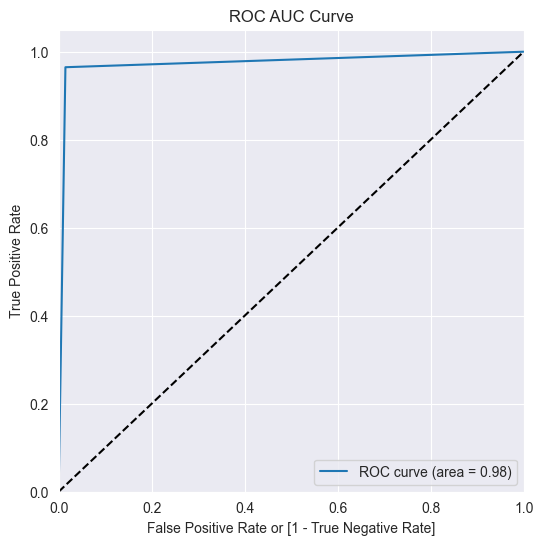

In [80]:
# ROC curve
fpr, tpr, thresholds = draw_roc(y_val, y_val_pred)

Model 4. AdaBoost Classifier

In [81]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline   # 👈 use imblearn's Pipeline
from sklearn.model_selection import GridSearchCV

# Define AdaBoost
adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(),
    random_state=42
)

# Build pipeline with imblearn
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),  # works now
    ('adaboost', adaboost)
])

# Hyperparameter grid
param_grid = {
    'adaboost__n_estimators': [50, 100, 200],
    'adaboost__learning_rate': [0.01, 0.1, 1],
    'adaboost__estimator__max_depth': [1, 3, 5],
    'smote__sampling_strategy': [0.5, 1.0],
}

# GridSearch
ada_grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit
ada_grid_search.fit(X_train, y_train)

print("Best params:", ada_grid_search.best_params_)
print("Best score:", ada_grid_search.best_score_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the defa

[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.01, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   0.4s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.01, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   0.5s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.01, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   0.4s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.01, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   0.5s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.01, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   0.5s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the defa

[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.01, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   0.6s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.01, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   0.6s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.01, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   0.7s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.01, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   0.5s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.01, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   0.6s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.01, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   0.7s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.01, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   0.9s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.01, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   0.9s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.01, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   0.7s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the defa

[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.01, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   0.7s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.01, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   0.9s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.01, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   0.9s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.01, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   0.9s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.01, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   1.1s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.01, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   1.0s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.01, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   1.4s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.01, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   1.4s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.01, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   1.4s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.01, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   1.4s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.1, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   0.4s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.01, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   1.3s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.1, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   0.4s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.1, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   0.4s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.1, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   0.4s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.1, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   0.4s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.1, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   0.5s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.01, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   2.0s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.01, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   1.9s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.1, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   0.5s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the defa

[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.1, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   0.5s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.01, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   2.2s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.1, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   0.5s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.1, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   0.5s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.01, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   1.9s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.01, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   1.9s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.1, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   0.7s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the defa

[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.1, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   0.8s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.1, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   0.7s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.1, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   0.6s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.1, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   0.6s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.1, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   1.0s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.1, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   0.9s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.1, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   0.9s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.1, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   0.9s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.1, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   1.2s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.1, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   1.3s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.1, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   1.4s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.1, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   1.3s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=1, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   0.4s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.1, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   1.4s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.1, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   1.5s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=1, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   0.4s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=1, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   0.3s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=1, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   0.3s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.1, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   2.0s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=1, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   0.4s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.1, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   1.9s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.1, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   1.9s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the defa

[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=1, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   0.5s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=1, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   0.5s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=1, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   0.4s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=1, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   0.5s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=1, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   0.5s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.1, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   1.9s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=0.1, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   2.0s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=1, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   0.7s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=1, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   0.7s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=1, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   0.7s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=1, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   0.6s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=1, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   0.7s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=1, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   1.0s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=1, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   1.0s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=1, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   1.0s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=1, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   0.9s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=1, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   1.0s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=1, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   1.4s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=1, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   1.4s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=1, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   1.3s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=1, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   1.4s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=1, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   1.4s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.01, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   0.6s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.01, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   0.7s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=1, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   1.9s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.01, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   0.7s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=1, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   2.1s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=1, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   1.9s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.01, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   0.7s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.01, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   0.7s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=1, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   2.0s
[CV] END adaboost__estimator__max_depth=1, adaboost__learning_rate=1, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   2.0s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.01, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   1.0s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.01, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   1.0s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.01, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   1.0s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.01, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   1.1s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.01, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   1.0s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.01, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   1.3s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.01, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   1.5s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.01, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   1.6s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.01, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   1.5s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.01, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   1.6s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.01, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   2.2s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.01, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   2.2s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.01, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   2.4s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.01, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   2.2s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.01, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   2.1s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.01, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   2.8s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.01, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   2.7s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.01, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   2.9s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.01, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   2.7s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.1, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   0.7s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.01, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   2.7s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.1, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   0.7s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.1, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   0.7s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.1, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   0.7s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.1, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   0.6s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.01, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   4.3s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.1, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   1.2s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.1, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   1.2s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.01, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   4.2s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.1, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   1.1s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.01, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   4.3s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.1, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   1.2s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.1, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   1.1s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.01, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   4.2s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.1, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   1.5s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.1, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   1.4s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.01, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   4.6s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.1, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   1.5s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.1, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   1.4s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.1, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   1.4s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.1, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   2.1s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.1, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   2.2s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.1, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   2.1s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.1, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   2.2s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.1, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   2.2s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.1, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   2.8s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.1, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   2.8s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.1, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   2.9s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.1, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   2.8s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=1, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   0.8s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.1, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   2.8s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=1, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   0.7s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=1, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   0.7s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=1, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   0.7s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=1, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   0.7s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.1, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   4.3s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=1, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   1.1s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=1, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   1.1s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.1, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   4.2s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.1, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   4.4s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=1, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   1.1s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=1, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   1.1s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.1, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   4.3s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=1, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   1.1s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=0.1, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   4.3s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the defa

[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=1, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   1.6s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=1, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   1.5s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=1, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   1.5s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=1, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   1.4s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=1, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   1.5s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=1, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   2.0s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=1, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   2.2s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=1, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   2.2s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=1, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   2.2s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=1, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   2.2s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=1, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   3.0s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=1, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   2.9s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=1, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   3.0s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=1, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   2.9s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=1, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   2.9s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.01, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   1.0s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.01, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   1.0s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.01, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   1.0s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.01, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   1.0s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=1, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   4.2s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.01, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   1.0s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=1, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   4.4s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=1, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   4.4s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.01, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   1.5s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.01, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   1.6s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.01, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   1.6s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=1, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   4.4s
[CV] END adaboost__estimator__max_depth=3, adaboost__learning_rate=1, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   4.5s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the defa

[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.01, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   1.6s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.01, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   1.7s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.01, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   2.1s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.01, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   2.0s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.01, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   2.0s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.01, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   2.1s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.01, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   2.1s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.01, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   3.3s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.01, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   3.1s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.01, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   3.2s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.01, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   3.1s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.01, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   3.2s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.01, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   4.1s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.01, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   4.1s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.01, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   4.3s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.1, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   1.1s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.01, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   4.2s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.01, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   4.2s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.1, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   1.1s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.1, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   1.1s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.1, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   1.1s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.1, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   1.1s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.1, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   1.5s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.01, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   6.3s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.1, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   1.6s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.01, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   6.2s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.01, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   6.4s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.1, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   1.6s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.1, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   1.6s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.1, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   1.8s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.01, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   6.2s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.1, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   2.1s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.01, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   6.5s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.1, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   2.3s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.1, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   2.1s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.1, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   2.1s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.1, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   2.1s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.1, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   3.2s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.1, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   3.3s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.1, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   3.3s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.1, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   3.5s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.1, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   3.7s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.1, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   4.6s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.1, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   4.6s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.1, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   4.7s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=1, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   1.4s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.1, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   5.4s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.1, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   5.2s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=1, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   1.3s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=1, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   1.1s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=1, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   1.1s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=1, adaboost__n_estimators=50, smote__sampling_strategy=0.5; total time=   1.1s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=1, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   1.5s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.1, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   7.6s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.1, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   7.3s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=1, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   1.7s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.1, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   7.4s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=1, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   1.6s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=1, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   1.6s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=1, adaboost__n_estimators=50, smote__sampling_strategy=1.0; total time=   1.6s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.1, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   7.3s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=0.1, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   7.2s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=1, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   2.1s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=1, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   2.1s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=1, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   2.1s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=1, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   2.0s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=1, adaboost__n_estimators=100, smote__sampling_strategy=0.5; total time=   2.0s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=1, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   3.2s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=1, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   3.3s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=1, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   3.3s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=1, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   3.2s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=1, adaboost__n_estimators=100, smote__sampling_strategy=1.0; total time=   3.4s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=1, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   3.5s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=1, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   3.9s


/Users/tanishq/PycharmProjects/project1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=1, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   4.1s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=1, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   3.9s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=1, adaboost__n_estimators=200, smote__sampling_strategy=0.5; total time=   3.9s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=1, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   5.9s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=1, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   5.7s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=1, adaboost__n_estimators=200, smote__sampling_strategy=1.0; total time=   5.6s
[CV] END adaboost__estimator__max_depth=5, adaboost__learning_rate=1, adaboost__n_estimators=200, smote__sampling_stra

In [82]:
# Predict on train set using the best model
y_train_pred = ada_grid_search.predict(X_train)

# Predict on train set using the validation model
y_val_pred = ada_grid_search.predict(X_val)

In [83]:
# Metrics on the train set
calculate_classification_metrics(y_train, y_train_pred)

Confusion Matrix

[[14589    65]
 [  171  1790]]


,Metric,Value
0,Accuracy,0.9858
1,Sensitivity,0.9128
2,Specificity,0.9956
3,Precision,0.9650
4,False Positive Rate,0.0044
5,True Positive Rate,0.9128


In [84]:
# Metrics on the validation set
calculate_classification_metrics(y_val, y_val_pred)

Confusion Matrix

[[3623   20]
 [  42  469]]


,Metric,Value
0,Accuracy,0.9851
1,Sensitivity,0.9178
2,Specificity,0.9945
3,Precision,0.9591
4,False Positive Rate,0.0055
5,True Positive Rate,0.9178


In [85]:
# Generate a classification report
class_report = classification_report(y_val, y_val_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3643
           1       0.96      0.92      0.94       511

    accuracy                           0.99      4154
   macro avg       0.97      0.96      0.96      4154
weighted avg       0.98      0.99      0.98      4154



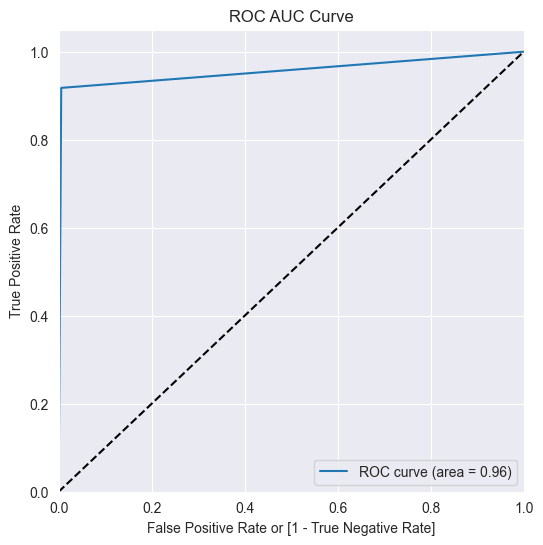

In [86]:
# ROC curve
fpr, tpr, thresholds = draw_roc(y_val, y_val_pred)

In [87]:
best = ada_grid_search.best_estimator_

result = permutation_importance(best, X_val, y_val, n_repeats=10, random_state=42)

feature_importance = pd.Series(result.importances_mean, index=feature_names).sort_values(ascending=False)
print(feature_importance)

Count of Citing Patents             0.088878
Count of Cited Refs - Non-patent    0.079634
Count of Cited Refs - Patent        0.037963
dtype: float64


In [88]:
#out file prepration
#Read quantum computing patent data and convert into data frame
#df_unseen=pd.read_csv("quant_csv2123.csv",skiprows=1)
df = df.dropna()
df_unseen

,Publication Number,Application Date,Publication Date,IPC Subclass,Assignee Standardized,Claims Count,Assignee Count,Inventor Standardized,Publication Country Code,Count of Cited Refs - Patent,Count of Cited Refs - Non-patent,Count of Citing Patents,DWPI Count of Family Members,DWPI Count of Family Countries/Regions
0,IN202441099749A,2024-12-17,2024-12-20,H04L | G06Q,JAYAKANI S | RANI VENNILA FATHIMA S | BANU RAF...,10.0,5,JAYAKANI S | RANI VENNILA FATHIMA S | BANU RAF...,IN,0,0,0,1.0,1.0
1,TR2024019326A2,2024-12-16,2024-12-23,G06Q,TURKCELL TEKNOLOJİ ARAŞTIRMA VE GELİŞTİRME ANO...,16.0,1,ÖMER YILMAZ,TR,0,0,0,1.0,1.0
2,IN202441099497A,2024-12-16,2024-12-27,G06Q,SAVEETHA ENGINEERING COLLEGE,6.0,1,KANAGARAJ ALIAS GANESAN M | KARTHICK K K | VIM...,IN,0,0,0,1.0,1.0
3,TR2024018329A2,2024-12-11,2024-12-23,G06Q,TURKCELL TEKNOLOJİ ARAŞTIRMA VE GELİŞTİRME ANO...,8.0,2,ÖZGE GÜLER KUŞ | OZAN TEMMUZ GÜRCANOK,TR,0,0,0,1.0,1.0
4,IN202441096888A,2024-12-08,2024-12-13,G06Q | G06N | B32B,RAI KARUNAKARA B | HEMALATHA K J | PAREEK PIYU...,3.0,4,RAI KARUNAKARA B | HEMALATHA K J | PAREEK PIYU...,IN,0,0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29334,KR2025128947A,2023-01-04,2025-08-28,H04B | H01Q | H04W,LG ELECTRONICS INC | KOREA ADVANCED INSTITUTE ...,22.0,2,JUNG JAEHOON | KIM DANG OH | CHOI WOO CHEOL | ...,KR,0,0,0,2.0,138.0
29335,KR2025128946A,2023-01-04,2025-08-28,H04W | H01P | H01Q | H04B,LG ELECTRONICS INC | KOREA ADVANCED INSTITUTE ...,22.0,2,JUNG JAEHOON | KIM DANG OH | CHOI WOO CHEOL | ...,KR,0,0,0,2.0,138.0
29336,CN115981744B,2023-01-04,2025-07-25,G06F | G06Q,SHENZHEN QIANHAI WEBANK CO LTD,8.0,1,ZHANG CHEN | CHEN TING | YU JIAN | JIANG JIANG,CN,5,0,0,2.0,1.0
29337,AU2023200031B2,2023-01-04,2025-04-17,G06F | G06Q,SELFSERVEME PTY LTD,18.0,1,MADAFFERI LEON | BUNSHAW GAVIN,AU,2,0,0,8.0,133.0


In [89]:
scaler = StandardScaler()
'''num_vars = ['grant_lag_days','Claims Count','Assignee Count','count_inventor','Count of Cited Refs - Patent','Count of Cited Refs - Non-patent',
       'Count of Citing Patents','DWPI Count of Family Members','DWPI Count of Family Countries/Regions','RelatedApplicationCount',
        'IPC - Current Count','Sub Class Count']'''
num_vars=['Count of Cited Refs - Patent','Count of Cited Refs - Non-patent','Count of Citing Patents']

df_unseen_scaled=scaler.fit_transform(df_unseen[num_vars])
df_unseen_scaled

array([[-0.14579281, -0.24515085, -0.28985138],
       [-0.14579281, -0.24515085, -0.28985138],
       [-0.14579281, -0.24515085, -0.28985138],
       ...,
       [-0.00471643, -0.24515085, -0.28985138],
       [-0.08936226, -0.24515085, -0.28985138],
       [-0.14579281, -0.24515085, -0.28985138]])

feature_names_unseen=['grant_lag_days','Claims Count','Assignee Count','count_inventor','Count of Cited Refs - Patent','Count of Cited Refs - Non-patent',
       'Count of Citing Patents','DWPI Count of Family Members','DWPI Count of Family Countries/Regions','RelatedApplicationCount',
        'IPC - Current Count','Sub Class Count']
df_unseen[feature_names_unseen]



df_unseen_num=df_unseen[feature_names_unseen]
df_unseen_num

In [90]:
num_vars=['Count of Cited Refs - Patent','Count of Cited Refs - Non-patent','Count of Citing Patents']

#df_unseen[num_vars] = scaler.fit_transform(df_unseen[num_vars])
#df_unseen_num.head()
#df_unseen_num=df_unseen_num1
#df_unseen_num.dropna(how='all', inplace=True)
df_unseen = df_unseen.dropna(subset=['Count of Cited Refs - Patent','Count of Cited Refs - Non-patent','Count of Citing Patents'])
#df_unseen_num = df_unseen_num.dropna()
# Use SandardScaler to scale values
#scaler = StandardScaler()

# Fit and transform training set
X_unseen_scaled = pd.DataFrame(df_unseen_scaled, columns =df_unseen[num_vars].columns, index = df_unseen.index)
#X_unseen_scaled.dropna(how='all', inplace=True)
X_unseen_scaled


,Count of Cited Refs - Patent,Count of Cited Refs - Non-patent,Count of Citing Patents
0,-0.145793,-0.245151,-0.289851
1,-0.145793,-0.245151,-0.289851
2,-0.145793,-0.245151,-0.289851
3,-0.145793,-0.245151,-0.289851
4,-0.145793,-0.245151,-0.289851
...,...,...,...
29334,-0.145793,-0.245151,-0.289851
29335,-0.145793,-0.245151,-0.289851
29336,-0.004716,-0.245151,-0.289851
29337,-0.089362,-0.245151,-0.289851


In [91]:
df_unseen.isna().sum()

Publication Number                        0
Application Date                          0
Publication Date                          0
IPC Subclass                              0
Assignee Standardized                     0
Claims Count                              0
Assignee Count                            0
Inventor Standardized                     0
Publication Country Code                  0
Count of Cited Refs - Patent              0
Count of Cited Refs - Non-patent          0
Count of Citing Patents                   0
DWPI Count of Family Members              0
DWPI Count of Family Countries/Regions    0
dtype: int64

In [92]:
#X_toModel.drop(['High Quality'],axis=1, inplace=True)
X_unseen_scaled['High Quality'] = lr_grid_search.predict(X_unseen_scaled)
df_unseen['High Quality']=X_unseen_scaled['High Quality']
df_unseen.to_csv('FinTech3OutputLR.csv',index=True)

X_unseen_scaled.drop(['High Quality'],axis=1, inplace=True)
X_unseen_scaled['High Quality'] = gnb_grid_search.predict(X_unseen_scaled)
df_unseen['High Quality']=X_unseen_scaled['High Quality']
df_unseen.to_csv('FinTech3OutputGNB.csv',index=True)
'''
X_unseen_scaled.drop(['High Quality'],axis=1, inplace=True)
X_unseen_scaled['High Quality'] = svm_grid_search.predict(X_unseen_scaled)
df_unseen['High Quality']=X_unseen_scaled['High Quality']
df_unseen.to_csv('GeneOutputSVM.csv',index=True)'''

X_unseen_scaled.drop(['High Quality'],axis=1, inplace=True)
X_unseen_scaled['High Quality'] = dt_grid_search.predict(X_unseen_scaled)
df_unseen['High Quality']=X_unseen_scaled['High Quality']
df_unseen.to_csv('FinTech3OutputDT.csv',index=True)

X_unseen_scaled.drop(['High Quality'],axis=1, inplace=True)
X_unseen_scaled['High Quality'] = rf_grid_search.predict(X_unseen_scaled)
df_unseen['High Quality']=X_unseen_scaled['High Quality']
df_unseen.to_csv('FinTech3OutputRF.csv',index=True)

X_unseen_scaled.drop(['High Quality'],axis=1, inplace=True)
X_unseen_scaled['High Quality'] = ada_grid_search.predict(X_unseen_scaled)
df_unseen['High Quality']=X_unseen_scaled['High Quality']
df_unseen.to_csv('FinTech3OutputADA.csv',index=True)
'''
X_unseen_scaled.drop(['High Quality'],axis=1, inplace=True)
X_unseen_scaled['High Quality'] = ann_grid_search.predict(X_unseen_scaled)
df_unseen['High Quality']=X_unseen_scaled['High Quality']
df_unseen.to_csv('OutputANN.csv',index=True)
'''



"\nX_unseen_scaled.drop(['High Quality'],axis=1, inplace=True)\nX_unseen_scaled['High Quality'] = ann_grid_search.predict(X_unseen_scaled)\ndf_unseen['High Quality']=X_unseen_scaled['High Quality']\ndf_unseen.to_csv('OutputANN.csv',index=True)\n"

In [ ]:
df_unseen_HQ = df_unseen[df_unseen['High Quality'] == 1].copy()
df_unseen_notHQ = df_unseen[df_unseen['High Quality'] == 0].copy()

In [ ]:
print(df_unseen_HQ['grant_lag_days'].mean())
print(df_unseen['grant_lag_days'].mean())
print(df_unseen_notHQ['grant_lag_days'].mean())

In [ ]:
print(df_unseen_HQ['Claims Count'].mean())
print(df_unseen['Claims Count'].mean())
print(df_unseen_notHQ['Claims Count'].mean())

In [ ]:
print(df_unseen_HQ['Assignee Count'].mean())
print(df_unseen['Assignee Count'].mean())
print(df_unseen_notHQ['Assignee Count'].mean())

In [ ]:
print(df_unseen_HQ['Count of Cited Refs - Patent'].mean())
print(df_unseen['Count of Cited Refs - Patent'].mean())
print(df_unseen_notHQ['Count of Cited Refs - Patent'].mean())

In [ ]:
print(df_unseen_HQ['Count of Cited Refs - Non-patent'].mean())
print(df_unseen['Count of Cited Refs - Non-patent'].mean())
print(df_unseen_notHQ['Count of Cited Refs - Non-patent'].mean())

In [ ]:
print(df_unseen_HQ['Count of Citing Patents'].mean())
print(df_unseen['Count of Citing Patents'].mean())
print(df_unseen_notHQ['Count of Citing Patents'].mean())

In [ ]:
print(df_unseen_HQ['DWPI Count of Family Members'].mean())
print(df_unseen['DWPI Count of Family Members'].mean())
print(df_unseen_notHQ['DWPI Count of Family Members'].mean())

In [ ]:
print(df_unseen_HQ['DWPI Count of Family Countries/Regions'].mean())
print(df_unseen['DWPI Count of Family Countries/Regions'].mean())
print(df_unseen_notHQ['DWPI Count of Family Countries/Regions'].mean())

In [ ]:
print(df_unseen_HQ['count_inventor'].mean())
print(df_unseen['count_inventor'].mean())
print(df_unseen_notHQ['count_inventor'].mean())

In [ ]:
print(df_unseen_HQ['SubClassTotalCount'].mean())
print(df_unseen['SubClassTotalCount'].mean())
print(df_unseen_notHQ['SubClassTotalCount'].mean())

In [ ]:
df_unseen_HQ.shape


In [ ]:
df_unseen_notHQ.shape

In [ ]:
# Get top 20 countries based on frequency
top_20_App_countries = df_unseen['Application Country/Region'].value_counts().nlargest(20)
print(top_20_App_countries)

In [ ]:
# Create the plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top_20_App_countries.index, top_20_App_countries.values, color='steelblue')

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height), 
             ha='center', va='bottom', rotation=0, fontsize=12)

# Customize the plot
plt.title('Top 20 Application Countries/Regions')
plt.xlabel('Country/Region')
plt.ylabel('Number of Patents')
plt.ylim(10,6000)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# HQ Get top 20 countries based on frequency
top_20_App_countries_HQ = df_unseen_HQ['Application Country/Region'].value_counts().nlargest(20)
df_country = pd.DataFrame()
df_country['all']=df_unseen['Application Country/Region'].value_counts().nlargest(20)
df_country['hq']=df_unseen_HQ['Application Country/Region'].value_counts().nlargest(20)
df_country.to_csv('FinTech_country.csv',index='true')
print(top_20_App_countries_HQ)

In [ ]:
# Create the plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top_20_App_countries_HQ.index, top_20_App_countries_HQ.values, color='steelblue')

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height), 
             ha='center', va='bottom', rotation=0, fontsize=12)

# Customize the plot
plt.title('Top 20 Application Countries/Regions')
plt.xlabel('Country/Region')
plt.ylabel('Number of Patents')
plt.ylim(10,1500)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
top_20_pub_countries = df_unseen['Publication Country Code'].value_counts().nlargest(20)
print(top_20_pub_countries)

In [ ]:
top_20_pub_countries = df_unseen_HQ['Publication Country Code'].value_counts().nlargest(20)
print(top_20_pub_countries)

In [ ]:
top_20_assignees = df_unseen['Assignee/Applicant'].value_counts().nlargest(4000)
print(top_20_assignees)

In [ ]:
top_20_assignees = df_unseen_HQ['Assignee/Applicant'].value_counts().nlargest(4000)
df_assignee = pd.DataFrame()
df_assignee['all']=df_unseen['Assignee/Applicant'].value_counts().nlargest(4000)
df_assignee['hq']=df_unseen_HQ['Assignee/Applicant'].value_counts().nlargest(4000)
df_assignee.to_csv('FinTech_assignee.csv',index='true')
print(top_20_assignees)

In [ ]:
df_unseen['inventor_list']
# Explode the list into separate rows
df_exploded = df_unseen.explode('inventor_list')

# Count frequency
frequency = df_exploded['inventor_list'].value_counts().nlargest(4000)

# Convert to DataFrame
frequency_df = frequency.reset_index()
frequency_df.columns = ['Element', 'Frequency']
#top_20_inventors=frequency_df.value_counts().nlargest(20)
df_inventor = pd.DataFrame()
df_inventor['all']=df_exploded['inventor_list'].value_counts().nlargest(4000)
print(frequency_df)

In [ ]:
df_unseen_HQ['inventor_list']
# Explode the list into separate rows
df_exploded = df_unseen_HQ.explode('inventor_list')

# Count frequency
frequency = df_exploded['inventor_list'].value_counts().nlargest(4000)

# Convert to DataFrame
frequency_df = frequency.reset_index()
frequency_df.columns = ['Element', 'Frequency']
#top_20_inventors=frequency_df.value_counts().nlargest(20)

df_inventor['hq']=df_exploded['inventor_list'].value_counts().nlargest(4000)
df_inventor.to_csv('gene_inventor.csv',index='true')
print(frequency_df)

In [ ]:
df_unseen['IPC Subclass 4-digit']
# Explode the list into separate rows
df_exploded = df_unseen.explode('IPC Subclass 4-digit')

# Count frequency
frequency = df_exploded['IPC Subclass 4-digit'].value_counts().nlargest(30)

# Convert to DataFrame
frequency_df = frequency.reset_index()
frequency_df.columns = ['Element', 'Frequency']

print(frequency_df)

In [ ]:
df_unseen_HQ['IPC Subclass 4-digit']
# Explode the list into separate rows
df_exploded = df_unseen_HQ.explode('IPC Subclass 4-digit')

# Count frequency
frequency = df_exploded['IPC Subclass 4-digit'].value_counts().nlargest(30)

# Convert to DataFrame
frequency_df = frequency.reset_index()
frequency_df.columns = ['Element', 'Frequency']

print(frequency_df)

In [ ]:
### **Summary of Metrics**
| Model                                   | Accuracy | Sensitivity (Recall)  | Specificity | Precision | FPR   | TPR   |
|------------------------------------   --|----------|-----------------------|-------------|-----------|-------|-------|
| Logistic Regression (PCA + Tuning)      | 0.8094   | 0.7990                | 0.8103      | 0.2766    | 0.1897| 0.7990|
| Gaussian Naive Bayes (PCA + Tuning)     | 0.8094   | 0.7990                | 0.8103      | 0.2766    | 0.1897| 0.7990|
| Support Vector (PCA + Tuning+ GridSearchCV)|0.8094 | 0.7990                | 0.8103      | 0.2766    | 0.1897| 0.7990|
| Decision Tree (PCA + GridSearchCV)      | 0.9378   | 0.9227                | 0.9392      | 0.5795    | 0.0608| 0.9227|
| Random Forest (PCA + Tuning)            | 0.9039   | 0.9363                | 0.9010      | 0.4619    | 0.0990| 0.9363|
| AdaBoost Classifier                     | 0.8366   | 0.8026                | 0.8397      | 0.3125    | 0.1603| 0.8026|
| Artificial Neural network (PCA + Tuning)| 0.9039   | 0.9363                | 0.9010      | 0.4619    | 0.0990| 0.9363|

---

### **Key Metrics to Consider**
1. **Accuracy**: Measures the overall correctness of predictions.
   - Decision Tree has the highest accuracy (93.78%).
   - Random Forest follows at 90.39%.

2. **Sensitivity (Recall or TPR)**: Measures the ability to correctly predict positive cases.
   - Random Forest performs the best (93.63%).
   - Decision Tree is close (92.27%).

3. **Specificity**: Measures the ability to correctly predict negative cases.
   - Decision Tree has the best specificity (93.92%).
   - Random Forest is slightly lower (90.10%).

4. **Precision**: Indicates the proportion of true positives among all predicted positives.
   - Decision Tree has the highest precision (57.95%), followed by Random Forest (46.19%).

5. **False Positive Rate (FPR)**: Measures how often negative cases are wrongly predicted as positive.
   - Decision Tree has the lowest FPR (6.08%), making it the least likely to misclassify negatives as positives.

6. **True Positive Rate (TPR)**: Same as Sensitivity.
   - Random Forest performs best, followed by Decision Tree.

---

### **Analysis and Recommendation**
1. **Primary Focus on Sensitivity (Recall)**:  
   If identifying positive cases (e.g., churn customers) is your priority, **Random Forest** is the best choice due to its highest sensitivity (93.63%).

2. **Balanced Performance Across Metrics**:  
   **Decision Tree** stands out with the highest accuracy (93.78%), precision (57.95%), and specificity (93.92%). It also has the lowest FPR (6.08%), making it a balanced model.

3. **Low Precision in Logistic Regression and AdaBoost**:  
   Both Logistic Regression and AdaBoost show very low precision (27.66% and 31.25%, respectively), indicating a high proportion of false positives. These models may not be suitable for your use case if false positives are a concern.

4. **Trade-offs**:  
   - **Decision Tree**: Best for balanced performance across all metrics. Lower sensitivity than Random Forest but still very high (92.27%).  
   - **Random Forest**: Best for identifying positives but has a slightly higher FPR (9.90%) than Decision Tree.  
   - **Logistic Regression** and **AdaBoost**: May not be ideal due to low precision and comparatively weaker performance.

---

### **Conclusion**
- **Decision Tree** is the best overall choice due to its balanced performance across all metrics, especially if interpretability and low false positives are critical.
- If you prioritize maximum sensitivity to minimize false negatives (e.g., missing churn cases), choose **Random Forest**.

Creating new column 'predicted' with 1 if HQ_Prob > 0.5 else 0

In [ ]:
#find out Language of Publication   values count
df['Language of Publication'].value_counts()

In [ ]:
# Univarients function
def plot_digram(df, column):
    fig, p = plt.subplots(1,2, figsize=(16, 4))
    sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sea.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column)
    p[1].set_xlabel(column)
    plt.tight_layout()
    plt.show()

In [ ]:
print(df.shape)
print(df["application_year"].describe())
df['application_year'].plot(kind='box')

In [ ]:
plot_digram(df,'Claims Count')
#print(loan_df["loan_amnt"].mean())
# describe the Loan Amount
df['Claims Count'].describe()

In [ ]:
# Distribution of the target variable i.e. price
plt.figure(figsize=(10, 6))
sea.distplot(df['Claims Count'])
plt.axvline(df['Claims Count'].mean(), color='r', linestyle='--', label='Mean Claims')
plt.axvline(df['Claims Count'].median(), color='g', linestyle='--', label='Median Claims')
plt.legend()
plt.title('Distribution of Claims Count')
plt.show()

In [ ]:
df_np=np.array(df)
df_np[:][1]

In [ ]:
df['Claims Count'].skew()

In [ ]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df['Publication Country Code'].value_counts().plot(kind='bar')
plt.title('Publication Country Code Histogram')
plt1.set(xlabel = 'Publication Country Code', ylabel='Count of patent')



In [ ]:
str(df['IPC - Current'][1:3])

In [ ]:
IPCList=[]
l_2d=[]
for i in range(0,len(df['IPC - Current'])):
    n=len(str(df['IPC - Current'][i]).split('|'))
    df['IPCCount']=n 
    print(n)
    for j in range(0,n):
        l=[]
        l=str(df['IPC - Current']).split('|')
        IPCList.extend(l)
    l_2d.append(l)
    df['IPCCount']=n    


#df['IPC - Current'].value_counts()

In [ ]:
len(IPCList)
df['IPCCount']

In [ ]:
len(IPCList)
list=[]
for i in IPCList:
    for j in i:
        print(j)
        list.append(j)
len(list)

In [ ]:
# Convert to DataFrame
df1 = pd.DataFrame(IPCList, columns=['IPC'])
df1['IPC'].value_counts()
#df1['IPC'].value_count()
#df['Inventor'].value_counts()


In [ ]:
df1['IPC']=IPCList
plt.subplot(1,3,1)
plt1 = df1['IPC'].value_counts().plot(kind='bar')
plt.title('IPC')
plt1.set(xlabel = 'IPC', ylabel='Count of IPC')